In [77]:
import pandas as pd
import numpy as np
df = pd.read_csv('pr_kafka.csv')

In [78]:
df['CreatedDate'] = pd.to_datetime(df['CreatedDate']).dt.date
df['EndDate'] = pd.to_datetime(df['EndDate']).dt.date

In [79]:
df['days'] =  df['EndDate'] - df['CreatedDate']
df

,author,status,level,CreatedDate,EndDate,title,description,days
0,chia7712,2,CONTRIBUTOR,2021-01-03,2021-01-05,MINOR: refactor FetchResponse#toMessage to avo...,Instead of creating intermediate collections t...,2 days
1,gwenshap,1,CONTRIBUTOR,2021-01-02,2021-01-04,MINOR: gradle wrapper should handle directorie...,If attempting to build the project from a dire...,2 days
2,asasvari,2,CONTRIBUTOR,2021-01-01,2021-01-03,MINOR: fix log message,Fix log message during shutdown\r\n\r\n*More d...,2 days
3,wenbingshen,2,CONTRIBUTOR,2021-01-01,2021-01-04,MINOR: rename produce to produces,Fixed a syntax error where the predicate neede...,3 days
4,dengziming,2,CONTRIBUTOR,2021-01-01,2021-01-03,MINOR: rename @returns to @return,As the title,2 days
...,...,...,...,...,...,...,...,...
9041,dibbhatt,1,NONE,2013-06-20,2016-01-29,KAFKA-948 : Update ReplicaStateMachine.scala,KAFKA-948\nWhen the broker which is the leader...,953 days
9042,MichaelBlume,1,NONE,2013-04-25,2016-01-29,Fix mis-spell in ConsumerConfig.scala,NaN,1009 days
9043,polymorphic,1,NONE,2013-03-25,2016-02-02,zkclient and scalatest library updates,Following https://issues.apache.org/jira/brows...,1044 days
9044,fsaintjacques,1,CONTRIBUTOR,2013-01-30,2015-07-20,KAFKA-294,This issue can be caused by a non-existing pat...,901 days


In [80]:
df['days'] = df['days'].dt.days.astype('int64')

In [81]:
df = df[df.status != 1]
df

,author,status,level,CreatedDate,EndDate,title,description,days
0,chia7712,2,CONTRIBUTOR,2021-01-03,2021-01-05,MINOR: refactor FetchResponse#toMessage to avo...,Instead of creating intermediate collections t...,2
2,asasvari,2,CONTRIBUTOR,2021-01-01,2021-01-03,MINOR: fix log message,Fix log message during shutdown\r\n\r\n*More d...,2
3,wenbingshen,2,CONTRIBUTOR,2021-01-01,2021-01-04,MINOR: rename produce to produces,Fixed a syntax error where the predicate neede...,3
4,dengziming,2,CONTRIBUTOR,2021-01-01,2021-01-03,MINOR: rename @returns to @return,As the title,2
5,hachikuji,2,CONTRIBUTOR,2020-12-30,2020-12-31,MINOR: Propagate version correctly in `FetchSn...,We missed this in the initial check-in of the ...,1
...,...,...,...,...,...,...,...,...
6874,becketqin,2,CONTRIBUTOR,2016-12-12,2016-12-13,KAFKA-4497: LogCleaner appended the wrong offs...,"The code in trunk has been changed, so we need...",1
7087,rajinisivaram,2,CONTRIBUTOR,2016-10-13,2018-04-05,KAFKA-4292: Configurable SASL callback handlers,Implementation of KIP-86: https://cwiki.apache...,539
7511,mjsax,2,MEMBER,2016-06-29,2016-06-30,hotfix: check join window boundaries,@guozhangwang Might need to rebase after https...,1
8410,sasakitoa,2,CONTRIBUTOR,2015-12-08,2018-05-25,KAFKA-2061: Offer a --version flag to print th...,Add version option to command line tools to pr...,899


In [82]:
#df.sort_values(by='EndDate', inplace=True)

In [83]:
df1 = df[df['days'] < 10]

In [84]:
df1.groupby(['days']).count() 

,author,status,level,CreatedDate,EndDate,title,description
days,,,,,,,
0,619,619,619,619,619,619,601
1,666,666,666,666,666,666,646
2,295,295,295,295,295,295,289
3,215,215,215,215,215,215,208
4,184,184,184,184,184,184,176
5,163,163,163,163,163,163,159
6,132,132,132,132,132,132,127
7,126,126,126,126,126,126,122
8,92,92,92,92,92,92,91


In [85]:
df1

,author,status,level,CreatedDate,EndDate,title,description,days
0,chia7712,2,CONTRIBUTOR,2021-01-03,2021-01-05,MINOR: refactor FetchResponse#toMessage to avo...,Instead of creating intermediate collections t...,2
2,asasvari,2,CONTRIBUTOR,2021-01-01,2021-01-03,MINOR: fix log message,Fix log message during shutdown\r\n\r\n*More d...,2
3,wenbingshen,2,CONTRIBUTOR,2021-01-01,2021-01-04,MINOR: rename produce to produces,Fixed a syntax error where the predicate neede...,3
4,dengziming,2,CONTRIBUTOR,2021-01-01,2021-01-03,MINOR: rename @returns to @return,As the title,2
5,hachikuji,2,CONTRIBUTOR,2020-12-30,2020-12-31,MINOR: Propagate version correctly in `FetchSn...,We missed this in the initial check-in of the ...,1
...,...,...,...,...,...,...,...,...
5135,onurkaraman,2,CONTRIBUTOR,2017-10-16,2017-10-16,MINOR: reduce partition state machine debug lo...,PartitionStateMachine.electLeaderForPartition ...,0
5677,hachikuji,2,CONTRIBUTOR,2021-01-05,2021-01-06,MINOR: Missing entity type tags,"This patch adds a few missing ""entity type"" ta...",1
6874,becketqin,2,CONTRIBUTOR,2016-12-12,2016-12-13,KAFKA-4497: LogCleaner appended the wrong offs...,"The code in trunk has been changed, so we need...",1
7511,mjsax,2,MEMBER,2016-06-29,2016-06-30,hotfix: check join window boundaries,@guozhangwang Might need to rebase after https...,1


In [86]:
df1.groupby('days').count()

,author,status,level,CreatedDate,EndDate,title,description
days,,,,,,,
0,619,619,619,619,619,619,601
1,666,666,666,666,666,666,646
2,295,295,295,295,295,295,289
3,215,215,215,215,215,215,208
4,184,184,184,184,184,184,176
5,163,163,163,163,163,163,159
6,132,132,132,132,132,132,127
7,126,126,126,126,126,126,122
8,92,92,92,92,92,92,91


In [87]:
df1['days'] = np.where(df1['days'].between(0,1), 1, df1['days'])#1 = 0 
df1['days'] = np.where(df1['days'].between(2,9), 2, df1['days']) #2 = 1

df1

/var/folders/jz/rvrrcmrs7xg91nsn45d4tykc0000gn/T/ipykernel_1803/35995681.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['days'] = np.where(df1['days'].between(0,1), 1, df1['days'])#1 = 0
/var/folders/jz/rvrrcmrs7xg91nsn45d4tykc0000gn/T/ipykernel_1803/35995681.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['days'] = np.where(df1['days'].between(2,9), 2, df1['days']) #2 = 1


,author,status,level,CreatedDate,EndDate,title,description,days
0,chia7712,2,CONTRIBUTOR,2021-01-03,2021-01-05,MINOR: refactor FetchResponse#toMessage to avo...,Instead of creating intermediate collections t...,2
2,asasvari,2,CONTRIBUTOR,2021-01-01,2021-01-03,MINOR: fix log message,Fix log message during shutdown\r\n\r\n*More d...,2
3,wenbingshen,2,CONTRIBUTOR,2021-01-01,2021-01-04,MINOR: rename produce to produces,Fixed a syntax error where the predicate neede...,2
4,dengziming,2,CONTRIBUTOR,2021-01-01,2021-01-03,MINOR: rename @returns to @return,As the title,2
5,hachikuji,2,CONTRIBUTOR,2020-12-30,2020-12-31,MINOR: Propagate version correctly in `FetchSn...,We missed this in the initial check-in of the ...,1
...,...,...,...,...,...,...,...,...
5135,onurkaraman,2,CONTRIBUTOR,2017-10-16,2017-10-16,MINOR: reduce partition state machine debug lo...,PartitionStateMachine.electLeaderForPartition ...,1
5677,hachikuji,2,CONTRIBUTOR,2021-01-05,2021-01-06,MINOR: Missing entity type tags,"This patch adds a few missing ""entity type"" ta...",1
6874,becketqin,2,CONTRIBUTOR,2016-12-12,2016-12-13,KAFKA-4497: LogCleaner appended the wrong offs...,"The code in trunk has been changed, so we need...",1
7511,mjsax,2,MEMBER,2016-06-29,2016-06-30,hotfix: check join window boundaries,@guozhangwang Might need to rebase after https...,1


In [88]:
#df1['days'] = np.where(df1['days'].between(2,4),3, df1['days']) # 3 = 6 to 19
#df1['days'] = np.where(df1['days'].between(4,9),4, df1['days']) # 3 = 6 to 19
#df1

In [89]:
df1.groupby(['days']).count() 

,author,status,level,CreatedDate,EndDate,title,description
days,,,,,,,
1,1285,1285,1285,1285,1285,1285,1247
2,1259,1259,1259,1259,1259,1259,1223


In [90]:
import matplotlib.pyplot as plt
from scipy.stats import linregress


In [91]:
#df2 =df1.dropna()

df2 = df1.fillna('zero')


In [92]:
df2.isna().sum()

author         0
status         0
level          0
CreatedDate    0
EndDate        0
title          0
description    0
days           0
dtype: int64

In [93]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2544 entries, 0 to 8429
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   author       2544 non-null   object
 1   status       2544 non-null   int64 
 2   level        2544 non-null   object
 3   CreatedDate  2544 non-null   object
 4   EndDate      2544 non-null   object
 5   title        2544 non-null   object
 6   description  2544 non-null   object
 7   days         2544 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 178.9+ KB


In [94]:
df2['input_data'] =df2['title']+' '+df2['author']+' '+df2['level'] #+' '+df2['author']+' '+df2['level']+' '+ df2['description']

In [95]:
df2.input_data

0       MINOR: refactor FetchResponse#toMessage to avo...
2             MINOR: fix log message asasvari CONTRIBUTOR
3       MINOR: rename produce to produces  wenbingshen...
4       MINOR: rename @returns to @return dengziming C...
5       MINOR: Propagate version correctly in `FetchSn...
                              ...                        
5135    MINOR: reduce partition state machine debug lo...
5677    MINOR: Missing entity type tags hachikuji CONT...
6874    KAFKA-4497: LogCleaner appended the wrong offs...
7511    hotfix: check join window boundaries mjsax MEMBER
8429    MINOR: Manually ported changes in 8c3c9548b636...
Name: input_data, Length: 2544, dtype: object

In [96]:
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import os
import random
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
import re
import nltk
import string
import numpy as np

In [97]:
def clean_text(lf):
    description_ = list()
    lines = lf["input_data"].values.tolist()
    for text in lines:
        text = text.lower()
        
        pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
        text = pattern.sub('', text)
        
        emoji = re.compile("["
                           u"\U0001F600-\U0001FFFF"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
        text = emoji.sub(r'', text)
        
        text = re.sub(r"i'm", "i am", text)
        text = re.sub(r"he's", "he is", text)
        text = re.sub(r"she's", "she is", text)
        text = re.sub(r"that's", "that is", text)        
        text = re.sub(r"what's", "what is", text)
        text = re.sub(r"where's", "where is", text) 
        text = re.sub(r"\'ll", " will", text)  
        text = re.sub(r"\'ve", " have", text)  
        text = re.sub(r"\'re", " are", text)
        text = re.sub(r"\'d", " would", text)
        text = re.sub(r"\'ve", " have", text)
        text = re.sub(r"won't", "will not", text)
        text = re.sub(r"don't", "do not", text)
        text = re.sub(r"did't", "did not", text)
        text = re.sub(r"can't", "can not", text)
        text = re.sub(r"it's", "it is", text)
        text = re.sub(r"couldn't", "could not", text)
        text = re.sub(r"have't", "have not", text)
        
        text = re.sub(r"[,.\"!@#$%^&*(){}?/;`~:<>+=-]", "", text)
        tokens = word_tokenize(text)
        table = str.maketrans('', '', string.punctuation)
        stripped = [w.translate(table) for w in tokens]
        words = [word for word in stripped if word.isalpha()]
        stop_words = set(stopwords.words("english"))
        stop_words.discard("not")
        words = [w for w in words if not w in stop_words]
        words = ' '.join(words)
        description_.append(words)
    return description_

description_ = clean_text(df2)
description_[0:40000]


['minor refactor fetchresponsetomessage avoid creating lot contributor',
 'minor fix log message asasvari contributor',
 'minor rename produce produces wenbingshen contributor',
 'minor rename returns return dengziming contributor',
 'minor propagate version correctly fetchsnapshotrequest constructor hachikuji contributor',
 'ensure partitioninfo replicas not null client quota callback hachikuji contributor',
 'increase targetmessagespersec replicascaletest contributor',
 'handle rebalanceinprogress error joingroup showuon contributor',
 'minor fix connector startup error logging contributor',
 'eostestdriververifyalltransactionfinished break contributor',
 'eostestdriververifyalltransactionfinished break contributor',
 'minor use toplevel error updatefeaturesrequestgeterrorresponse hachikuji contributor',
 'minor kafka streams updates release bbejeck contributor',
 'minor updating files latest release bbejeck contributor',
 'hotfix fix failed contributor',
 'minor use apiutils methods

In [98]:
df2.groupby(['days']).count()

,author,status,level,CreatedDate,EndDate,title,description,input_data
days,,,,,,,,
1,1285,1285,1285,1285,1285,1285,1285,1285
2,1259,1259,1259,1259,1259,1259,1259,1259


In [99]:
TV = TfidfVectorizer(min_df=3)
CV =CountVectorizer(min_df = 10)
L1= CV.fit_transform(description_).toarray()
y = df2['days'].to_numpy()
print(np.shape(L1))
print(np.shape(y))

(2544, 293)
(2544,)


In [100]:
import cv2 as cv
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support,matthews_corrcoef
from sklearn.metrics import plot_confusion_matrix


In [101]:
#k-Nearest Neighbors.Decision Trees.Naive Bayes.Random Forest.Gradient Boostin

In [102]:
X_train, X_test, y_train, y_test = train_test_split(L1, y, test_size = 0.2, random_state =100)

model =  DecisionTreeClassifier(max_depth = 10)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, f1_score, precision_score
print("acuracy score :",accuracy_score(y_test, y_pred))
print("f1 score :",f1_score(y_test, y_pred))
print("Precision score :",precision_score(y_test, y_pred))
print("recall score :", recall_score(y_test, y_pred))
print('mcc:', matthews_corrcoef(y_test, y_pred))

acuracy score : 0.6286836935166994
f1 score : 0.6330097087378641
Precision score : 0.652
recall score : 0.6150943396226415
mcc: 0.2583572218956644


In [117]:
y_test


array([1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1,
       2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2,
       1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1,
       2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2,
       1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1,
       2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1,
       2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2,
       1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2,

In [118]:
B = np.where(y_test > 1, 1, 0)
print (B)


[0 1 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 1
 1 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 0 0 0
 0 1 1 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 1 0
 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0
 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1
 1 1 1 0 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 1 0 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1
 1 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1
 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 1 0 1
 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 1
 1 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 0 0 1 0
 1 0 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 0
 0 1 1 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0
 1 0 0 1 1 1 0 0 1 1 0 0 

In [120]:
from sklearn.metrics import roc_curve, roc_auc_score
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(B, y_pred)

print('roc_auc_score for DecisionTree: ', roc_auc_score(B, y_pred))


roc_auc_score for DecisionTree:  0.5726415094339623


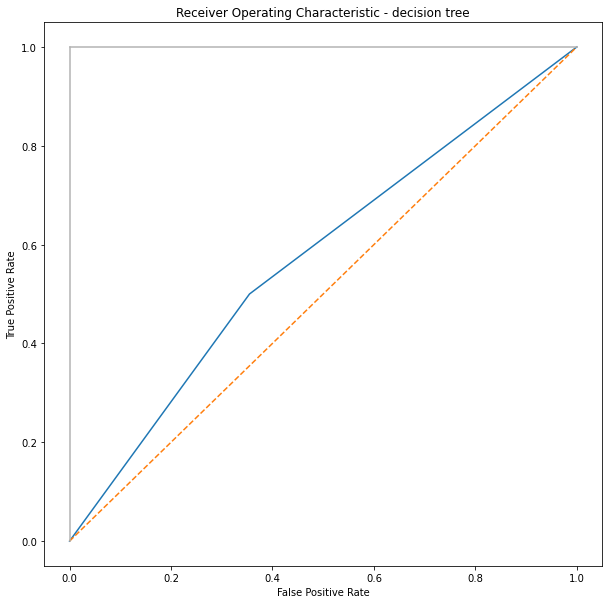

In [121]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - decision tree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

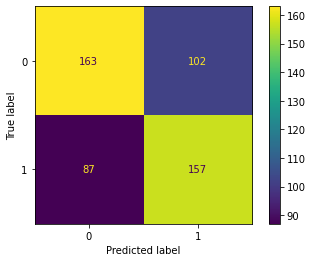

In [103]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [115]:
classifiers = [KNeighborsClassifier(10),
               DecisionTreeClassifier(max_depth=10),
               RandomForestClassifier(n_estimators=1000, max_depth=5),
               LogisticRegression(max_iter=100000),
               GaussianNB(),
               MLPClassifier(hidden_layer_sizes=(100, 100, 100),
                             max_iter=10000, activation='relu'),]

clf_names = ["Nearest Neighbors (k=10)",           
             "Decision Tree (Max Depth=10)",
             "Random Forest (Max Depth=5)",
             "Logistic Regression",
             "Gaussian Naive Bayes",
             "MLP (RelU)",]
scores_micro = dict()
scores_macro = dict()
scores_mcc = dict()
for name, clf in zip(clf_names, classifiers):
    print("fitting classifier", name)
    clf.fit(X_train, y_train)
    print("predicting labels for classifier", name)
    y_pred = clf.predict(X_test)
    scores_micro[name] = precision_recall_fscore_support(
        y_test, y_pred, average="micro")
    scores_macro[name] = precision_recall_fscore_support(
        y_test, y_pred, average="macro")
    scores_mcc[name] = matthews_corrcoef(y_test, y_pred)

scores_micro_df = pd.DataFrame(scores_micro, index=[
                               'precision (micro)', 'recall (micro)', 'fscore (micro)', 'support'])
scores_micro_df = scores_micro_df[0:3]  # drop support
scores_macro_df = pd.DataFrame(scores_macro, index=[
                               'precision (macro)', 'recall (macro)', 'fscore (macro)', 'support'])
scores_macro_df = scores_macro_df[0:3]
scores_df = scores_macro_df.append(scores_micro_df).append(
    pd.Series(scores_mcc, name='MCC'))

fitting classifier Nearest Neighbors (k=10)
predicting labels for classifier Nearest Neighbors (k=10)
fitting classifier Decision Tree (Max Depth=10)
predicting labels for classifier Decision Tree (Max Depth=10)
fitting classifier Random Forest (Max Depth=5)
predicting labels for classifier Random Forest (Max Depth=5)
fitting classifier Logistic Regression
predicting labels for classifier Logistic Regression
fitting classifier Gaussian Naive Bayes
predicting labels for classifier Gaussian Naive Bayes
fitting classifier MLP (RelU)
predicting labels for classifier MLP (RelU)


/var/folders/jz/rvrrcmrs7xg91nsn45d4tykc0000gn/T/ipykernel_1803/1253255853.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_df = scores_macro_df.append(scores_micro_df).append(
/var/folders/jz/rvrrcmrs7xg91nsn45d4tykc0000gn/T/ipykernel_1803/1253255853.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_df = scores_macro_df.append(scores_micro_df).append(


In [116]:
scores_df


,Nearest Neighbors (k=10),Decision Tree (Max Depth=10),Random Forest (Max Depth=5),Logistic Regression,Gaussian Naive Bayes,MLP (RelU)
precision (macro),0.573521,0.630774,0.606078,0.608055,0.578487,0.574216
recall (macro),0.555738,0.630993,0.605428,0.607153,0.575766,0.572642
fscore (macro),0.532436,0.630533,0.605414,0.607072,0.573842,0.571669
precision (micro),0.565815,0.630648,0.607073,0.609037,0.579568,0.575639
recall (micro),0.565815,0.630648,0.607073,0.609037,0.579568,0.575639
fscore (micro),0.565815,0.630648,0.607073,0.609037,0.579568,0.575639
MCC,0.128030,0.261767,0.211505,0.215206,0.154229,0.146849


In [104]:
import pandas as pd
df4 = pd.read_csv('pr_kafka_predict.csv')
df4

,author,name,level,CreatedDate,title,description
0,vitojeng,Vito Jeng,CONTRIBUTOR,2021-01-04 06:53:50,KAFKA-5876: Apply UnknownStateStoreException f...,follow-up #8200\r\n\r\nKAFKA-5876's PR break i...
1,vitojeng,Vito Jeng,CONTRIBUTOR,2021-01-04 06:53:50,KAFKA-5876: Apply UnknownStateStoreException f...,follow-up #8200\r\n\r\nKAFKA-5876's PR break i...
2,dengziming,dengziming,CONTRIBUTOR,2021-01-04 05:06:01,MINOR: Make data in FetchSnapshotReq and Fetch...,*More detailed description of your change*\r\n...
3,dengziming,dengziming,CONTRIBUTOR,2021-01-04 05:06:01,MINOR: Make data in FetchSnapshotReq and Fetch...,*More detailed description of your change*\r\n...
4,dengziming,dengziming,CONTRIBUTOR,2021-01-03 09:31:29,KAFKA-10694: Implement zero copy for FetchSnap...,*More detailed description of your change*\r\n...
...,...,...,...,...,...,...
1569,granthenke,Grant Henke,MEMBER,2015-11-19 14:49:09,KAFKA-2423: Introduce Scalastyle,Just the buildscript changes and rules configu...
1570,becketqin,Jiangjie (Becket) Qin,CONTRIBUTOR,2015-09-09 17:18:44,KAFKA-2512: Add version check to broker and cl...,NaN
1571,becketqin,Jiangjie (Becket) Qin,CONTRIBUTOR,2015-09-09 17:18:44,KAFKA-2512: Add version check to broker and cl...,NaN
1572,pronix,Dmitry Vasilets,NONE,2015-05-10 20:07:59,add support libvirt as provider. KAFKA-2183,https://issues.apache.org/jira/browse/KAFKA-21...


In [105]:
df4.fillna('zero', inplace = True)

In [106]:
df4.isna().sum()

author         0
name           0
level          0
CreatedDate    0
title          0
description    0
dtype: int64

In [107]:
 df4['input_data'] = df4['title']+' '+df4['author']+' '+df4['level']   #+' '+ df4['title']


In [108]:
df4.isna().sum()

author         0
name           0
level          0
CreatedDate    0
title          0
description    0
input_data     0
dtype: int64

In [109]:
description_5 = clean_text(df4)


In [110]:
TV = TfidfVectorizer(min_df=3)
CV =CountVectorizer(max_features = 293)
L1= CV.fit_transform(description_5).toarray()

print(np.shape(L1))


(1574, 293)


In [111]:
z = model.predict(L1)

In [112]:
import sys
np.set_printoptions(threshold=sys.maxsize)
print(z)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1
 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

In [113]:
import pandas as pd 
predictions =  pd.read_csv('pr_kafka_output.csv')
predictions['predicted_time'] = z
predictions

,Unnamed: 0,author,name,level,CreatedDate,title,status_predicted,predicted_time
0,0,vitojeng,Vito Jeng,CONTRIBUTOR,2021-01-04 06:53:50,KAFKA-5876: Apply UnknownStateStoreException f...,not merged,2
1,1,vitojeng,Vito Jeng,CONTRIBUTOR,2021-01-04 06:53:50,KAFKA-5876: Apply UnknownStateStoreException f...,not merged,2
2,2,dengziming,dengziming,CONTRIBUTOR,2021-01-04 05:06:01,MINOR: Make data in FetchSnapshotReq and Fetch...,not merged,2
3,3,dengziming,dengziming,CONTRIBUTOR,2021-01-04 05:06:01,MINOR: Make data in FetchSnapshotReq and Fetch...,not merged,2
4,4,dengziming,dengziming,CONTRIBUTOR,2021-01-03 09:31:29,KAFKA-10694: Implement zero copy for FetchSnap...,not merged,2
...,...,...,...,...,...,...,...,...
1569,1569,granthenke,Grant Henke,MEMBER,2015-11-19 14:49:09,KAFKA-2423: Introduce Scalastyle,not merged,2
1570,1570,becketqin,Jiangjie (Becket) Qin,CONTRIBUTOR,2015-09-09 17:18:44,KAFKA-2512: Add version check to broker and cl...,not merged,2
1571,1571,becketqin,Jiangjie (Becket) Qin,CONTRIBUTOR,2015-09-09 17:18:44,KAFKA-2512: Add version check to broker and cl...,not merged,2
1572,1572,pronix,Dmitry Vasilets,NONE,2015-05-10 20:07:59,add support libvirt as provider. KAFKA-2183,not merged,2


In [114]:
predictions.loc[:, 'predicted_time'].replace([1,2], ['0 to 2 days', '3 to 5 days'], inplace=True)
predictions

,Unnamed: 0,author,name,level,CreatedDate,title,status_predicted,predicted_time
0,0,vitojeng,Vito Jeng,CONTRIBUTOR,2021-01-04 06:53:50,KAFKA-5876: Apply UnknownStateStoreException f...,not merged,3 to 5 days
1,1,vitojeng,Vito Jeng,CONTRIBUTOR,2021-01-04 06:53:50,KAFKA-5876: Apply UnknownStateStoreException f...,not merged,3 to 5 days
2,2,dengziming,dengziming,CONTRIBUTOR,2021-01-04 05:06:01,MINOR: Make data in FetchSnapshotReq and Fetch...,not merged,3 to 5 days
3,3,dengziming,dengziming,CONTRIBUTOR,2021-01-04 05:06:01,MINOR: Make data in FetchSnapshotReq and Fetch...,not merged,3 to 5 days
4,4,dengziming,dengziming,CONTRIBUTOR,2021-01-03 09:31:29,KAFKA-10694: Implement zero copy for FetchSnap...,not merged,3 to 5 days
...,...,...,...,...,...,...,...,...
1569,1569,granthenke,Grant Henke,MEMBER,2015-11-19 14:49:09,KAFKA-2423: Introduce Scalastyle,not merged,3 to 5 days
1570,1570,becketqin,Jiangjie (Becket) Qin,CONTRIBUTOR,2015-09-09 17:18:44,KAFKA-2512: Add version check to broker and cl...,not merged,3 to 5 days
1571,1571,becketqin,Jiangjie (Becket) Qin,CONTRIBUTOR,2015-09-09 17:18:44,KAFKA-2512: Add version check to broker and cl...,not merged,3 to 5 days
1572,1572,pronix,Dmitry Vasilets,NONE,2015-05-10 20:07:59,add support libvirt as provider. KAFKA-2183,not merged,3 to 5 days
